In [11]:
import pandas as pd
import getpass
from functions import connect_mysql, mysql_list
import mysql
import seaborn as sns

# Input User id
try:
    # password input hashed
    id = getpass.getpass("id: ") 
except Exception as ex:
    print('Error Occured : ', ex)
#Input password
try:
    # password input hashed
    pwd = getpass.getpass("password: ") 
except Exception as ex:
    print('Error Occured : ', ex)

#host for RDS connection
host = "mdsi-dsp-spr-2020.cehiwpryiego.ap-southeast-2.rds.amazonaws.com"
mydb = connect_mysql(host, id, pwd)

if mydb: 
    print("Connection Successful")
    

id: ········
password: ········
Connection Successful


In [12]:
from functions import mysql_list
mydb = connect_mysql(host, id, pwd)
mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES;")
# create a list of database
db_list = mysql_list(mycursor.fetchall())
print(db_list) 
# asx is the database to be used
db = "asx"

['asx', 'information_schema', 'mysql', 'performance_schema']


In [13]:
mydb = connect_mysql(host, id, pwd, db)
mycursor = mydb.cursor()
mycursor.execute("SHOW TABLES;")
tb_list = mysql_list(mycursor.fetchall())
print(tb_list)

['ASX200_index', 'GDP_history_year', 'asx200', 'asx200_June_2020', 'asx200_month', 'asx_all', 'asx_history', 'asx_s_and_p', 'australia_GDP_1960_2020_usd', 'cashrate', 'exchange_rate', 'national_net_lending', 'net_lending_borrowing', 'new_loan_commitment_value_properties_purchased', 's_and_p', 'unemployment_rate', 'vix']


In [6]:
from IPython.display import display, HTML
mydb = connect_mysql(host, id, pwd, db)

for tb in tb_list:
    df = pd.read_sql_query("SELECT * FROM %s" % (tb), con=mydb)
    print(tb)
    display(df.head())

mydb.close()

ASX200_index


,Effective date,S&P/ASX 200,Materials,Financials,Information Technology,Health Care
0,2017-10-20,5906.99,10659.95,6678.32,921.54,23800.35
1,2017-10-23,5893.96,10623.88,6666.65,923.62,23826.46
2,2017-10-24,5897.61,10677.71,6653.66,926.00,23885.72
3,2017-10-25,5905.60,10784.19,6664.13,930.20,23797.23
4,2017-10-26,5916.30,10763.92,6669.53,940.96,23980.72


GDP_history_year


,id,Year,Stocks_traded_perc_GDP,Market_cap_domestic_perc_GDP,account_bal_perc_GDP,GDP_growth_perc,GDP_per_cap
0,1,1971-01-01,0.000000,0.0,0.0,4.003724,3489.952294
1,2,1972-01-01,0.000000,0.0,0.0,3.912656,3943.787639
2,3,1973-01-01,0.000000,0.0,0.0,2.613394,4763.628390
3,4,1974-01-01,0.000000,0.0,0.0,4.103552,6473.165153
4,5,1975-01-01,1.205098,0.0,0.0,1.349973,6994.209927


asx200


,Code,Company,Trading Halt
0,A2M,The a2 Milk Company Ltd,N
1,ABC,Adbri Ltd,N
2,ABP,Abacus Property Group,N
3,AGL,AGL Energy Ltd,N
4,AIA,Auckland International Airport Ltd,N


asx200_June_2020


,Code,Company,Sector,Market Cap,Weight(%)
0,A2M,The a2 Milk Company Ltd,Consumer Staples,"12,806,500,000",0.74
1,ABC,Adbri Ltd,Materials,"1,930,710,000",0.11
2,ABP,Abacus Property Group,Real Estate,"1,679,500,000",0.10
3,AGL,AGL Energy Ltd,Utilities,"10,537,700,000",0.61
4,ALL,Aristocrat Leisure Ltd,Consumer Discretionary,"16,908,600,000",0.98


asx200_month


,date,open,high,low,close,adj_close,volume
0,1992-12-01,1452.300049,1564.699951,1442.099976,1564.699951,1564.699951,0.0
1,1993-01-01,1576.099976,1579.900024,1502.199951,1536.500000,1536.500000,0.0
2,1993-02-01,1538.300049,1623.900024,1538.300049,1620.199951,1620.199951,0.0
3,1993-03-01,1652.800049,1689.699951,1623.599976,1674.500000,1674.500000,0.0
4,1993-04-01,1676.400024,1716.000000,1662.000000,1685.199951,1685.199951,0.0


asx_all


,Code,Company name,GICS industry group
0,14D,1414 DEGREES LIMITED,Capital Goods
1,1AD,ADALTA LIMITED,"Pharmaceuticals, Biotechnology & Life Sciences"
2,1AG,ALTERRA LIMITED,Commercial & Professional Services
3,1ST,1ST GROUP LIMITED,Health Care Equipment & Services
4,2BE,TUBI LIMITED,Energy


asx_history


,Code,Date,Open,High,Low,Close,Adj Close,Volume
0,ABC,1988-01-29,1.70226,1.70226,1.70226,1.70226,0.69355,0
1,ALQ,1988-01-29,0.27083,0.27083,0.27083,0.27083,0.00405,0
2,AMC,1988-01-29,2.10952,2.10952,2.10952,2.10952,0.62561,0
3,ANN,1988-01-29,15.03350,15.03350,15.03350,15.03350,9.74244,0
4,ANZ,1988-01-29,3.20574,3.20574,3.20574,3.20574,0.97758,0


asx_s_and_p


,date,asx_open,s_and_p_open
0,1992-12-01,1452.300049,431.350006
1,1993-01-01,1576.099976,435.700012
2,1993-02-01,1538.300049,438.779999
3,1993-03-01,1652.800049,443.380005
4,1993-04-01,1676.400024,451.670013


australia_GDP_1960_2020_usd


,date,GDP_billions_usd,per_capita_usd
0,1960-03-01,25.610,0.00
1,1960-06-01,26.464,11.09
2,1960-09-01,26.580,0.90
3,1960-12-01,26.590,-0.80
4,1961-03-01,26.636,1.21


cashrate


,Date,Change,CashRate
0,1990-01-23,-0.50 to -1.00,17.00 to 17.50
1,1990-02-15,-0.5,16.50 to 17.00
2,1990-03-07,0,16.50 to 17.00
3,1990-04-04,-1.00 to -1.50,15.00 to 15.50
4,1990-05-02,0,15.00 to 15.50


exchange_rate


,Date,Rate
0,2010-10-01,0.964692
1,2010-10-02,0.971345
2,2010-10-03,0.973047
3,2010-10-04,0.971817
4,2010-10-05,0.966464


national_net_lending


,date,National net lending (net borrowing)
0,Jun-00,None
1,Sep-00,None
2,Dec-00,None
3,Mar-01,None
4,Jun-01,None


net_lending_borrowing


,Date,Non-financial corporations ($b),Financial corporations ($b),General government ($b),Households ($b)
0,Jun-07,-17.8,3.2,2.9,-6.9
1,Sep-07,-20.2,3.2,4.1,-7.9
2,Dec-07,-22.2,7.8,1.6,-8.1
3,Mar-08,-24.2,7.3,1.5,-4.7
4,Jun-08,-24.7,9.4,1.8,-1.9


new_loan_commitment_value_properties_purchased


,Date,Total Commitment Value of Properties Purchased,Commitment Value of Owner Occupied Properties Purchased,Commitment Value of Investment Properties Purchased,Commitment Value from First Home Buyer
0,2002-07-01,10003.6,6025.1,3978.5,1466.2
1,2002-08-01,9981.6,5986.3,3995.3,1387.3
2,2002-09-01,10073.3,6036.9,4036.5,1327.4
3,2002-10-01,10236.2,6192.7,4043.5,1338.1
4,2002-11-01,10323.2,6259.7,4063.5,1307.5


s_and_p


,date,open,high,low,close,adj_close,volume
0,None,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,1992-06-01,415.350006,417.299988,399.920013,408.140015,408.140015,4.259830e+09
2,1992-07-01,408.200012,424.799988,407.200012,424.209992,424.209992,4.265220e+09
3,1992-08-01,424.190002,425.140015,408.299988,414.029999,414.029999,3.653820e+09
4,1992-09-01,414.029999,425.269989,412.709992,417.799988,417.799988,4.023850e+09


unemployment_rate


,Date,Rate (%)
0,2010-08-01,5.0
1,2010-09-01,5.1
2,2010-10-01,5.3
3,2010-11-01,5.1
4,2010-12-01,4.9


vix


,Date,Open,High,Low,Close
0,2004-01-02,17.96,18.68,17.54,18.22
1,2004-01-05,18.45,18.49,17.44,17.49
2,2004-01-06,17.66,17.67,16.19,16.73
3,2004-01-07,16.72,16.75,15.50,15.50
4,2004-01-08,15.42,15.68,15.32,15.61


In [14]:
df = pd.read_sql('SELECT * FROM asx_s_and_p', con = mydb)

df.set_index('date', inplace=True) ## set the date column as the index for the df

print(df.head) 

<bound method NDFrame.head of                asx_open  s_and_p_open
date                                 
1992-12-01  1452.300049    431.350006
1993-01-01  1576.099976    435.700012
1993-02-01  1538.300049    438.779999
1993-03-01  1652.800049    443.380005
1993-04-01  1676.400024    451.670013
...                 ...           ...
2020-07-01  5897.899902   3105.919922
2020-08-01  5927.799805   3288.260010
2020-09-01  6060.500000   3507.439941
2020-10-01  5815.899902   3385.870117
2020-10-12  6102.200195   6102.200195

[336 rows x 2 columns]>


<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'ASX200 compared with S&P 500 1992 - Present -- Gross trends')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Price')

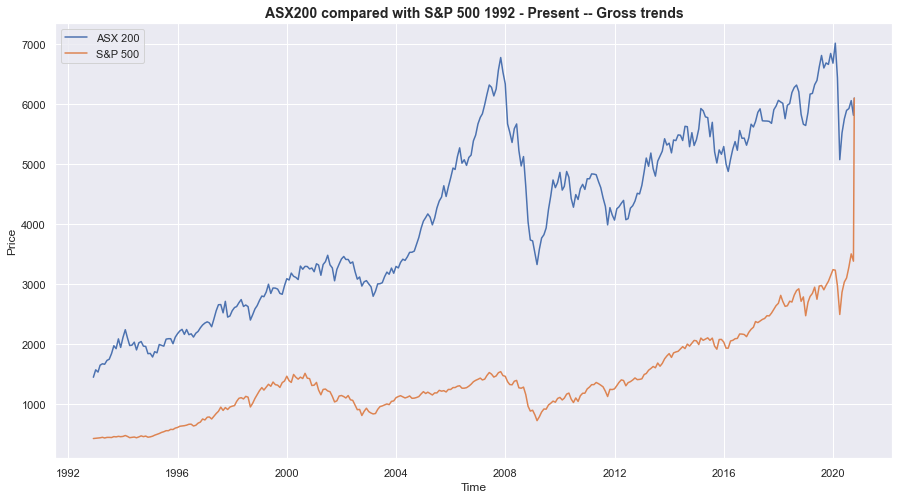

In [15]:
sns.set()

plt.figure(figsize=(15,8))

plt.title('ASX200 compared with S&P 500 1992 - Present -- Gross trends', fontsize = 14, fontweight = 'bold')
plt.plot('asx_open', data = df, label = 'ASX 200') ## ASX 200 open data
plt.plot('s_and_p_open', data = df, label = 'S&P 500') ## S&P 500 open data
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'ASX200 compared with S&P 500 1992 - Present')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Price Difference')

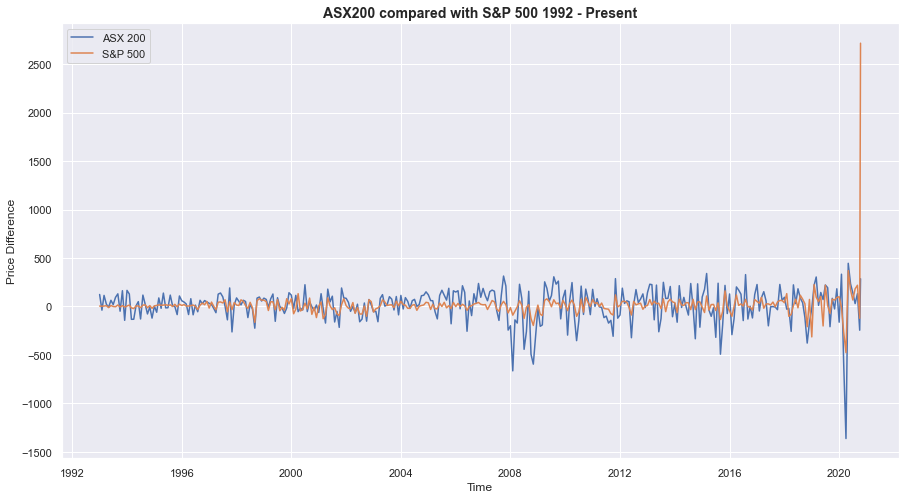

In [16]:
plt.figure(figsize=(15,8))
plt.title('ASX200 compared with S&P 500 1992 - Present', fontsize = 14, fontweight = 'bold')
plt.xlabel('Time')
plt.ylabel('Price Difference')
diff_plot = plt.plot(df.diff(periods = 1)) ## Get the difference between the months in each columns
plt.legend(labels = ['ASX 200','S&P 500'])